# Introduction to Data Science 
# Lecture 8: Temporal data analysis and applications to stock analysis
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll cover 
* temporal data analysis 
* importing stock data using the pandas_datareader python package 
* visualizing time series 
* rolling means
* time-domain vs frequency-domain analysis 

Parts of this lecture were adapted from a [previous lecture by *Curtis Miller*](https://github.com/datascience-course/2019-datascience-lectures/tree/master/08-time-series) 
and a [lecture on Time Series and Spectral Analysis by James Holland Jones](http://web.stanford.edu/class/earthsys214/notes/series.html). 

Further reading: 
+ Yves Hilpisch, Python for Finance, O'Reilly, (2014) [link](http://proquest.safaribooksonline.com.ezproxy.lib.utah.edu/book/programming/python/9781491945360).

For a more complete treatment, take Math 5075 (Time Series Analysis). 

## Temporal data analysis

A *time series* is a series of data points indexed by time, $x_i = x(t_i)$, for $i=1,\ldots,n$. Examples frequently occur in 
* weather forecasting, 
* mathematical finance (stocks),
* electricity demand in a power grid, 
* keystrokes on a computer, and 
* any applied science and engineering which involves temporal measurements

*Temporal data analysis* or *time series analysis* is just the study of such data. 

As a first example of time series data, we'll consider stocks and *mathematical finance*. 

##  Mathematical finance 

Prior to the 1980s, banking and finance were well-known for being "boring"; investment banking was distinct from commercial banking and the primary role of the industry was handling "simple" (at least in comparison to today) financial instruments, such as loans. Deregulation under the Regan administration, coupled with an influx of mathematics and computing power have transformed the industry from the "boring" business of banking to what it is today. 

* Advanced mathematics, such as analysis of the [Black-Scholes model](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model), is now essential to finance. 
* Algorithms are now responsible for making split-second decisions. In fact, [the speed at which light travels is a limitation when designing trading systems](http://www.nature.com/news/physics-in-finance-trading-at-the-speed-of-light-1.16872). 
* [Machine learning and data mining techniques are popular](http://www.ft.com/cms/s/0/9278d1b6-1e02-11e6-b286-cddde55ca122.html#axzz4G8daZxcl) in the financial sector. For example, **high-frequency trading (HFT)** is a branch of algorithmic trading where computers make thousands of trades in short periods of time, engaging in complex strategies such as statistical arbitrage and market making. HFT was responsible for phenomena such as the [2010 flash crash](https://en.wikipedia.org/wiki/2010_Flash_Crash) and a [2013 flash crash](http://money.cnn.com/2013/04/24/investing/twitter-flash-crash/) prompted by a hacked [Associated Press tweet](http://money.cnn.com/2013/04/23/technology/security/ap-twitter-hacked/index.html?iid=EL) about an attack on the White House.

### Installing `pandas_datareader`

We will use a package not included in the Anaconda distribution, [**pandas_datareader**](https://pydata.github.io/pandas-datareader/), that can be installed via the command prompt: 

    pip install pandas_datareader


In [1]:
#imports and setup

import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
from scipy.signal import periodogram

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## Getting and Visualizing Stock Data

### The `pandas_datareader` package 

From the `pandas_datareader` documentation: 

Functions from `pandas_datareader.data` and `pandas_datareader.wb` extract data from various internet sources into a pandas DataFrame. Currently the following sources are supported:

* Tiingo
* IEX* Alpha Vantage
* Enigma
* Quandl
* St.Louis FED (FRED)
* Kenneth French’s data library
* World Bank
* OECD
* Eurostat
* Thrift Savings Plan
* Nasdaq Trader symbol definitions
* Stooq
* MOEX

We will use the function 

    df = pandas_datareader.data.DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    
    
to import stock data as a pandas DataFrame. The arguments that we'll use are 
    
     name : str or list of strs 
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
        
As usual, you can type 
    
    help(pandas_datareader.data.DataReader)
    
to see the documentation of a python function. 

Now let's get some data.

In [2]:
start = datetime(2010, 1, 29)
end = datetime(2020, 1, 29)

AAPL = web.DataReader(name="AAPL", data_source="yahoo", start=start, end=end)
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-23,79.889999,78.912498,79.480003,79.807503,104472000.0,79.006119
2020-01-24,80.832497,79.379997,80.062500,79.577499,146537600.0,78.778435
2020-01-27,77.942497,76.220001,77.514999,77.237503,161940000.0,76.461929
2020-01-28,79.599998,78.047501,78.150002,79.422501,162234000.0,78.624992
2020-01-29,81.962502,80.345001,81.112503,81.084999,216229200.0,80.270790


What does this data mean? 
* **high** is the highest price of the stock on that trading day, 
* **low** the lowest price of the stock on that trading day, 
* **Open** is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day)
* **close** the price of the stock at closing time
* **Volume** indicates how many stocks were traded 
* **Adj Closed** is the price of the stock after adjusting for corporate actions. While stock prices are considered to be set mostly by traders, *stock splits* (when the company makes each extant stock worth two and halves the price) and *dividends* (payout of company profits per share) also affect the price of a stock and should be accounted for.

### Visualizing Stock Data

Now that we have stock data we can visualize it using the `matplotlib` package, called using a convenience method, `plot()` in pandas.

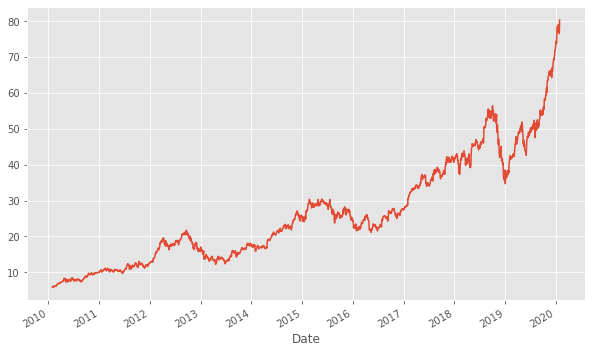

In [3]:
AAPL["Adj Close"].plot(grid = True); # Plot the adjusted closing price of AAPL

### Plotting multiple stocks together

For a variety of reasons, we may wish to plot multiple financial instruments together including:
* we may want to compare stocks
* compare them to the market or other securities such as [exchange-traded funds (ETFs)](https://en.wikipedia.org/wiki/Exchange-traded_fund).

Here, we plot the adjusted close for several stocks together. 

In [4]:
MSFT, GOOG = (web.DataReader(name=s, data_source="yahoo", start=start, end=end) for s in ["MSFT", "GOOG"])


# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
adj_close = pd.DataFrame({ "AAPL": AAPL["Adj Close"],
                           "MSFT": MSFT["Adj Close"],
                           "GOOG": GOOG["Adj Close"]})

adj_close.head()


,AAPL,MSFT,GOOG
Date,,,
2010-01-29,5.908337,21.947954,263.980530
2010-02-01,5.990476,22.127089,265.514771
2010-02-02,6.025239,22.166029,264.568329
2010-02-03,6.128909,22.298431,269.400208
2010-02-04,5.908031,21.683146,262.406433


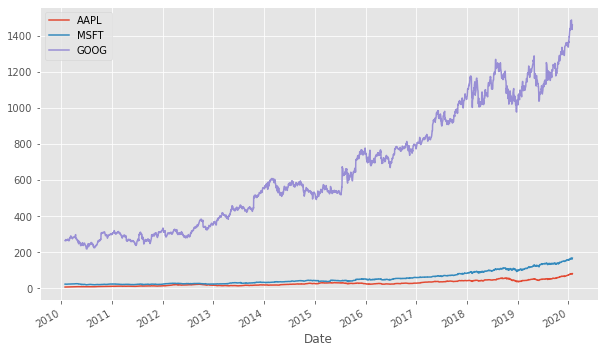

In [5]:
adj_close.plot(grid = True);

**Q:** Why is this plot difficult to read?

It plots the *absolute price* of stocks with time. While absolute price is important, frequently we are more concerned about the *relative change* of an asset rather than its absolute price. Also, Google stock is much more expensive than Apple or Microsoft stock, and this difference makes Apple and Microsoft stock appear less volatile than they truly are (that is, their price appears not to vary as much with time).

One solution is to use two different scales when plotting the data; one scale will be used by Apple and Microsoft stocks, and the other by Google.

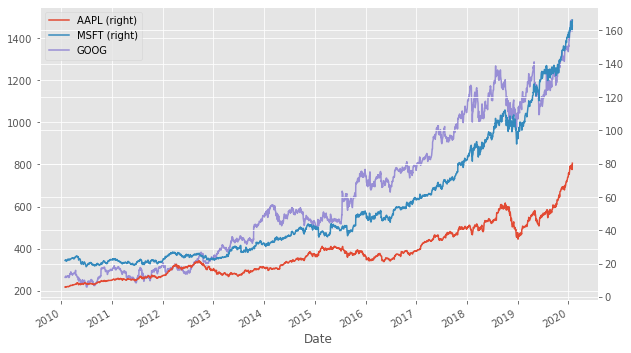

In [6]:
adj_close.plot(secondary_y = ["AAPL", "MSFT"], grid = True);

But, this solution clearly has limitations. We only have two sides of the plot to add more labels! 

A "better" solution is to plot the information we actually want. One option is to plot the *stock returns since the beginning of the period of interest*:

$$
\text{return}_{t,0} = \frac{\text{price}_t}{\text{price}_0}
$$

This requires transforming the data, which we do using a *lambda function*. 

In [7]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = adj_close.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,MSFT,GOOG
Date,,,
2010-01-29,1.000000,1.000000,1.000000
2010-02-01,1.013902,1.008162,1.005812
2010-02-02,1.019786,1.009936,1.002227
2010-02-03,1.037332,1.015969,1.020531
2010-02-04,0.999948,0.987935,0.994037


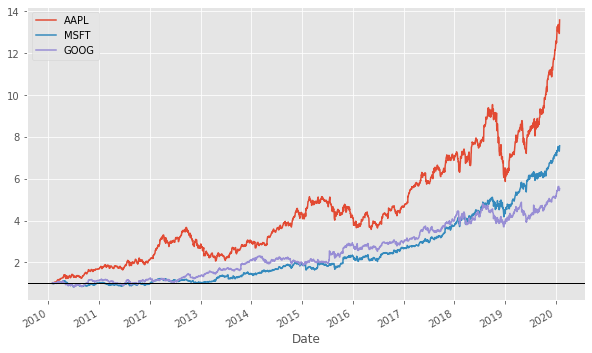

In [8]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 1);

This is a much more useful plot! Note: 
* We can now see how profitable each stock was since the beginning of the period. 
* Furthermore, we see that these stocks are highly correlated; they generally move in the same direction, a fact that was difficult to see in the other charts.

Alternatively, we could plot the change of each stock per day. One way to do so would be to use the *percentage increase of a stock*:
$$
\text{increase}_t = \frac{\text{price}_{t} - \text{price}_{t-1}}{\text{price}_t}
$$

or the *log difference*.

$$
\text{change}_t = \log\left( \frac{\text{price}_{t}}{\text{price}_{t - 1}} \right) = \log(\text{price}_{t}) - \log(\text{price}_{t - 1})
$$

Here, $\log$ is the natural log. Log difference has a desirable property: the sum of the log differences can be interpreted as the total change (as a percentage) over the period summed. Log differences also more cleanly correspond to how stock prices are modeled in continuous time.

We can obtain and plot the log differences of the data as follows.

In [9]:
stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,MSFT,GOOG
Date,,,
2010-01-29,NaN,NaN,NaN
2010-02-01,0.013806,0.008129,0.005795
2010-02-02,0.005786,0.001758,-0.003571
2010-02-03,0.017060,0.005955,0.018098
2010-02-04,-0.036704,-0.027981,-0.026303


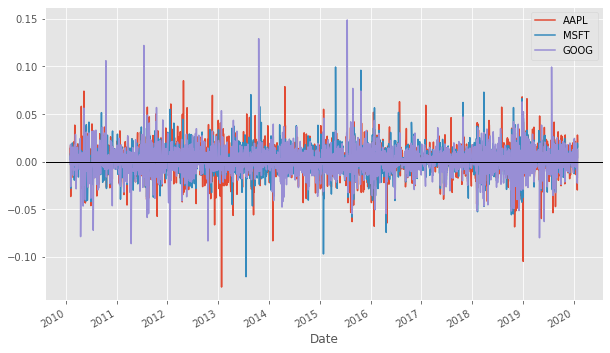

In [10]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 1);

Do you prefer to plot stock return or log difference? 

* Looking at returns since the beginning of the period make the overall trend of the securities apparent. 
* Log difference, however, emphasizes changes between days. 

### Comparing stocks to the overall market 

We often want to compare the performance of stocks to the performance of the overall market. 
[SPY](https://finance.yahoo.com/quote/SPY/) is the ticker symbol for the SPDR S&P 500 exchange-traded mutual fund (ETF), which is a fund that has roughly the stocks in the [S&P 500 stock index](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC). 
This serves as one measure for the overal market.

In [11]:
SPY = web.DataReader(name="SPY", data_source="yahoo", start=start, end=end)
SPY.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-23,332.170013,329.410004,330.630005,331.720001,51963000.0,325.638763
2020-01-24,332.529999,327.359985,332.440002,328.769989,87578400.0,322.742828
2020-01-27,325.119995,322.660004,323.029999,323.500000,84062500.0,317.569458
2020-01-28,327.850006,323.600006,325.059998,326.890015,63834000.0,320.897308
2020-01-29,328.630005,326.399994,328.380005,326.619995,53888900.0,320.632233


In [12]:
adj_close['SPY'] = SPY["Adj Close"]
adj_close.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2010-01-29,5.908337,21.947954,263.980530,86.313232
2010-02-01,5.990476,22.127089,265.514771,87.655464
2010-02-02,6.025239,22.166029,264.568329,88.716393
2010-02-03,6.128909,22.298431,269.400208,88.274338
2010-02-04,5.908031,21.683146,262.406433,85.549675


In [13]:
stock_return['SPY'] = adj_close[['SPY']].apply(lambda x: x / x[0])
#stock_return = adj_close.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2010-01-29,1.000000,1.000000,1.000000,1.000000
2010-02-01,1.013902,1.008162,1.005812,1.015551
2010-02-02,1.019786,1.009936,1.002227,1.027842
2010-02-03,1.037332,1.015969,1.020531,1.022721
2010-02-04,0.999948,0.987935,0.994037,0.991154


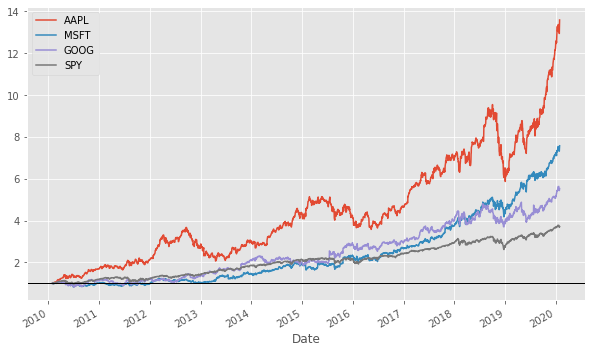

In [14]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 1);

In [15]:
stock_change['SPY'] = adj_close[['SPY']].apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2010-01-29,NaN,NaN,NaN,NaN
2010-02-01,0.013806,0.008129,0.005795,0.015431
2010-02-02,0.005786,0.001758,-0.003571,0.012031
2010-02-03,0.017060,0.005955,0.018098,-0.004995
2010-02-04,-0.036704,-0.027981,-0.026303,-0.031352


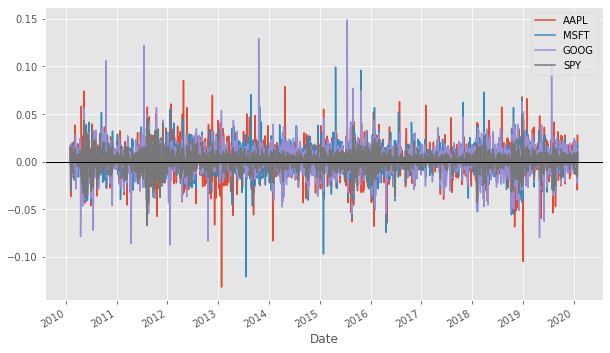

In [16]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 1);

### Moving Averages

For a time series $x_t$, the *$q$-day moving average at time $t$*, denoted $MA^q_t$, is the average of $x_t$ over the past $q$ days, 
$$
MA^q_t = \frac{1}{q} \sum_{i = 0}^{q-1} x_{t - i}
$$

The [`rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) function in Pandas provides functionality for computing moving averages. We'll use it to create a 20-day moving average for Apple stock data and plot it alongside the stock price. 

In [17]:
AAPL["20d"] = AAPL["Adj Close"].rolling(window = 20, center = False).mean()
AAPL.head(30)

,High,Low,Open,Close,Volume,Adj Close,20d
Date,,,,,,,
2010-01-29,7.221429,6.794643,7.181429,6.859286,1.245952e+09,5.908337,NaN
2010-02-01,7.000000,6.832143,6.870357,6.954643,7.498764e+08,5.990476,NaN
2010-02-02,7.011429,6.906429,6.996786,6.995000,6.983424e+08,6.025239,NaN
2010-02-03,7.150000,6.943571,6.970357,7.115357,6.153280e+08,6.128909,NaN
2010-02-04,7.084643,6.841786,7.026071,6.858929,7.576520e+08,5.908031,NaN
2010-02-05,7.000000,6.816071,6.879643,6.980714,8.503068e+08,6.012933,NaN
2010-02-08,7.067143,6.928571,6.988929,6.932857,4.782708e+08,5.971709,NaN
2010-02-09,7.053571,6.955357,7.015000,7.006786,6.328868e+08,6.035388,NaN
2010-02-10,7.021429,6.937857,6.996071,6.968571,3.703616e+08,6.002471,NaN


Notice how late the rolling average begins. It cannot be computed until twenty days have passed. Note that this becomes more severe for slower moving averages. 

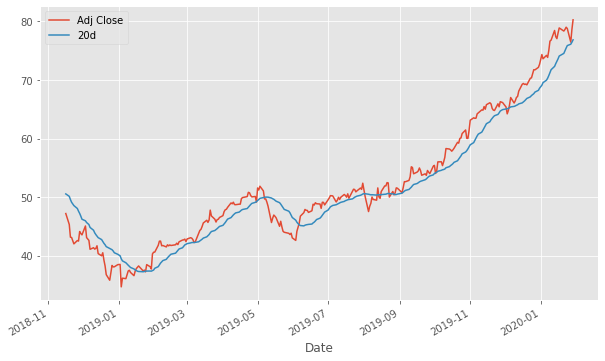

In [18]:
AAPL[["Adj Close", "20d"]].tail(300).plot(grid = True); 

Notice that the moving averages "smooths" the time series. This can sometimes make it easier to identify trends. The larger $q$, the less responsive a moving average is to fast fluctuations in the series $x_t$. 
So, if these fast fluctuations are considered "noise", a moving average will identify the "signal". 
* *Fast moving averages* have smaller $q$ and more closely follow the time series. 
* *Slow moving averages* have larger $q$ and respond less to the fluctuations of the stock.

Let's compare the 20-day, 50-day, and 200-day moving averages.


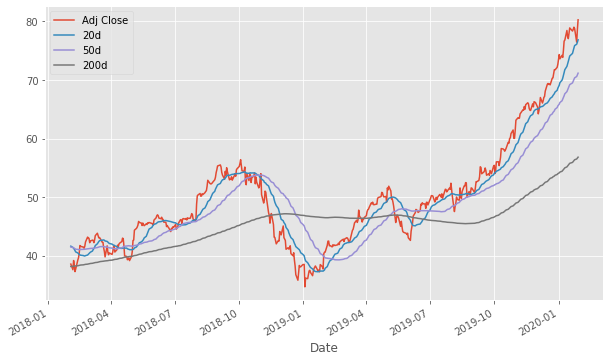

In [19]:
AAPL["50d"] = AAPL["Adj Close"].rolling(window = 50, center = False).mean()
AAPL["200d"] = AAPL["Adj Close"].rolling(window = 200, center = False).mean()

AAPL[["Adj Close", "20d", "50d", "200d"]].tail(500).plot(grid = True); 

The 20-day moving average is the most sensitive to fluctuations, while the 200-day moving average is the least sensitive. 

### Trading strategies and backtesting 


**Trading** is the practice of buying and selling financial assets for the purpose of making a profit. Traders develop **trading strategies** that a computer can use to make trades. Sometimes, these can be very complicated, but other times traders make decisions based on finding patterns or trends in charts. 

One example is called the [moving average crossover strategy](http://www.investopedia.com/university/movingaverage/movingaverages4.asp). 
This strategy is based on two moving averages, a "fast" one and a "slow" one. The strategy is:

* Trade the asset when the fast moving average crosses over the slow moving average.
* Exit the trade when the fast moving average crosses over the slow moving average again.

A trade will be prompted when the fast moving average crosses from below to above the slow moving average, and the trade will be exited when the fast moving average crosses below the slow moving average later.

This is the outline of a complete strategy and we already have the tools to get a computer to automatically implement the strategy.

But before we decide if we want to use it, we should first evaluate the quality of the strategy. The usual means for doing this is called **backtesting**, which is looking at how profitable the strategy is on historical data. 

You could now write python code that could implement and backtest a trading strategy. There are also lots of python packages for this:  
* [**pyfolio**](https://quantopian.github.io/pyfolio/) (for analytics)
* [**zipline**](http://www.zipline.io/beginner-tutorial.html) (for backtesting and algorithmic trading), and 
* [**backtrader**](https://www.backtrader.com/) (also for backtesting and trading). 




# Time-domain vs frequency-domain analysis  

So far, we have thought about a time series $x(t)$ in the "time domain". But, for some time series, it is easier to describe them in terms of the "frequency domain".

For example, a good way to describe the function  
$$
x(t) = \cos\left( 2 \pi f t \right)
$$
is as an oscillating function with frequency $f$ (or period $1/f$). 

According to [Fourier analysis](https://en.wikipedia.org/wiki/Fourier_transform), we can decompose any signal into its frequency components, 
$$
x(t) = \sum_{n=-\infty}^\infty \hat{x}(n) \ e^{2 \pi i n t}
\qquad \qquad t \in [0,1] 
$$
or 
$$
x(t) = \int_{-\infty}^\infty \hat{x}(f) \ e^{2 \pi i f t} \ df
\qquad \qquad t \in [-\infty,\infty]. 
$$

The 
[*power spectral density* or *periodogram*](https://en.wikipedia.org/wiki/Spectral_density) 
$S_{xx}(f) \approx |\hat x(f) |^2$ 
of a time series $x(t)$ describes the distribution of power into the frequency components that compose that signal. 

There are lots of time-dependent signals that are periodic or at least some of the signal is periodic. Examples: 
* [sunspots](https://en.wikipedia.org/wiki/Sunspot) follow an 11 year cycle. So if $x(t)$ was a time series representing the "strength" of the sunspot, we would have that $|\hat{x}(f)|^2$ would be large at $f = 1/11$. (Remember period = 1/frequency.)  
* The temperature in SLC. Here, we can decompose the temperature into a part that is varying over the course of a year, the part that varies over the day, and the "remaining" part.
* $\ldots$


We can compute the power spectral density using the scipy function 
[`periodogram`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.periodogram.html). 

To illustrate this, we'll follow the 
[course notes of James Holland Jones on Time Series and Spectral Analysis](http://web.stanford.edu/class/earthsys214/notes/series.html) 
and consider 
[historical measles data from New York City posted by Ben Bolker](https://ms.mcmaster.ca/~bolker/measdata.html). 


### Measles data

We can download the monthly measles data from New York City between 1928 and 1964. 

In [20]:
#df = pd.read_csv("nycmeas.dat", sep=" ", names=["date","cases"],index_col=0)
df = pd.read_csv("nycmeas.dat", sep=" ", names=["date","cases"])
df.head(20)

,date,cases
0,1928.000,609
1,1928.083,1516
2,1928.167,4952
3,1928.250,7466
4,1928.333,11155
5,1928.417,7002
6,1928.500,1315
7,1928.583,189
8,1928.667,74
9,1928.750,119


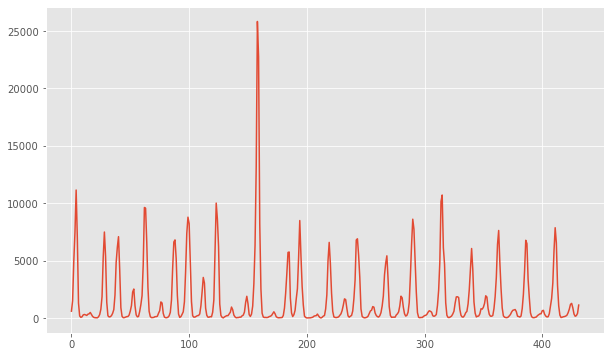

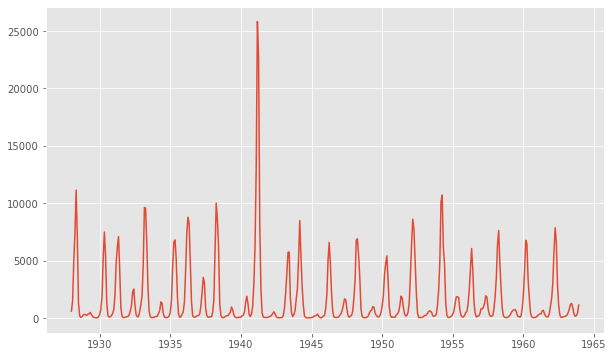

In [21]:
df["cases"].plot(grid = True); 
plt.show()
plt.plot(df["date"].tolist(), df["cases"].tolist())
plt.show()

Looking at the plot, we observe that the series is very regular with "periodically occuring" spikes. It appears that approximately once a year, there is a significant measles outbreak. By computing the power spectrum, we can see which frequencies make up this time series. 

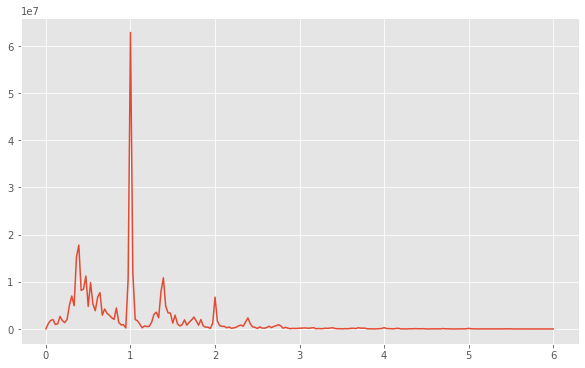

In [22]:
cases = df["cases"].values
#f, Pxx_den = periodogram(cases, window="hamming")
f, Pxx_den = periodogram(cases, fs=12, window="hamming")

plt.plot(f, Pxx_den);

Since there are 12 months per year, we set the measurement frequency argument in `periodogram` as fs=12. 

Clearly, the dominant frequency in this signal is 1 year. Why? 


**Q:** Is it useful to look at the power spectrum of stock data? 

**Exercise:** try it for the Apple stock data over the previous 10 years. 